In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [19]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_코로나.csv',encoding = "euc-kr", engine='python')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_숙박업소현황 _2020~2021.csv',encoding = "euc-kr", engine='python')

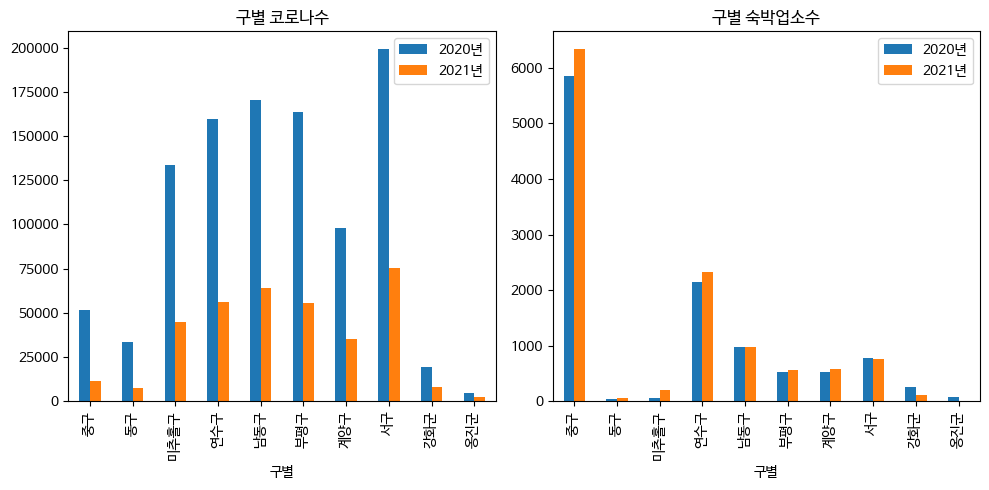

In [20]:
# 지역을 인덱스로 설정
df1.set_index('구별', inplace=True)
df2.set_index('구별', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df1.plot(kind='bar', ax=ax[0])
df2.plot(kind='bar', ax=ax[1])
ax[0].set_title('구별 코로나수')
ax[1].set_title('구별 숙박업소수')
plt.tight_layout()
plt.show()

In [21]:
from matplotlib.cm import datad
# 데이터 합치기
data = pd.merge(df1, df2, on='구별',how='left')

data

2020년_x  2021년_x  2020년_y  2021년_y
구별                                      
중구      51758    11188     5844     6339
동구      33767     7390       46       52
미추홀구   133750    44818       50      193
연수구    159758    55899     2152     2317
남동구    170238    64192      972      972
부평구    163812    55808      518      566
계양구     97760    35299      529      583
서구     199313    75268      773      760
강화군     19316     7825      251      110
옹진군      4651     2421       83        0

In [22]:
# 인구수을 내림차순으로 정렬
data = data.sort_values(by='2020년_x', ascending=False)

data

2020년_x  2021년_x  2020년_y  2021년_y
구별                                      
서구     199313    75268      773      760
남동구    170238    64192      972      972
부평구    163812    55808      518      566
연수구    159758    55899     2152     2317
미추홀구   133750    44818       50      193
계양구     97760    35299      529      583
중구      51758    11188     5844     6339
동구      33767     7390       46       52
강화군     19316     7825      251      110
옹진군      4651     2421       83        0

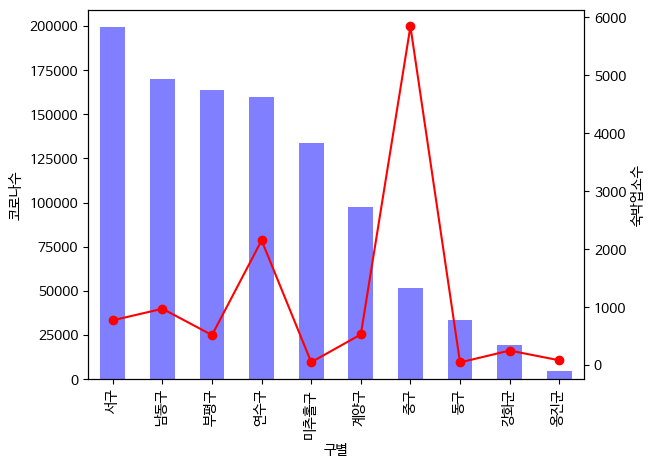

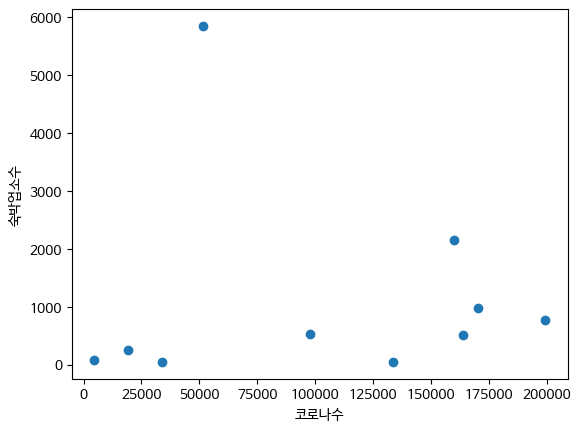

In [23]:
# 비교 그래프 그리기 - 2020년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2020년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2020년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('코로나수')
ax2.set_ylabel('숙박업소수')

plt.show()

# 산점도 그리기
plt.scatter(data['2020년_x'], data['2020년_y'])
plt.xlabel('코로나수')
plt.ylabel('숙박업소수')
plt.show()

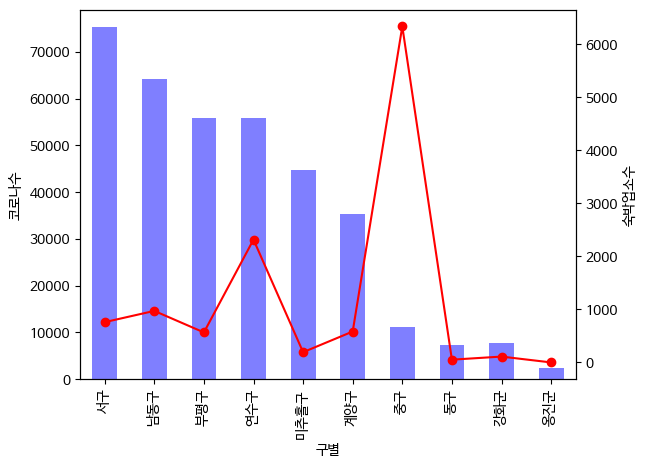

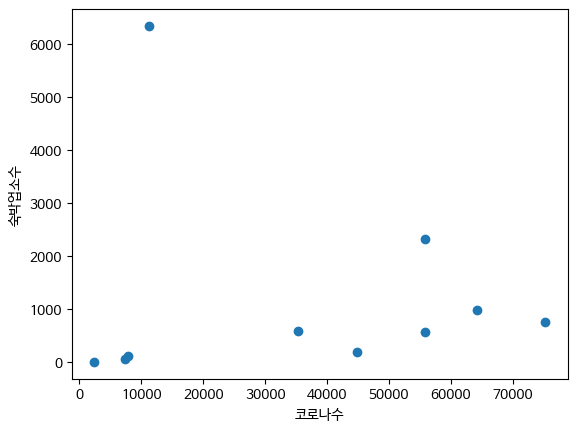

In [24]:
# 비교 그래프 그리기 - 2021년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2021년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2021년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('코로나수')
ax2.set_ylabel('숙박업소수')

plt.show()

# 산점도 그리기
plt.scatter(data['2021년_x'], data['2021년_y'])
plt.xlabel('코로나수')
plt.ylabel('숙박업소수')
plt.show()

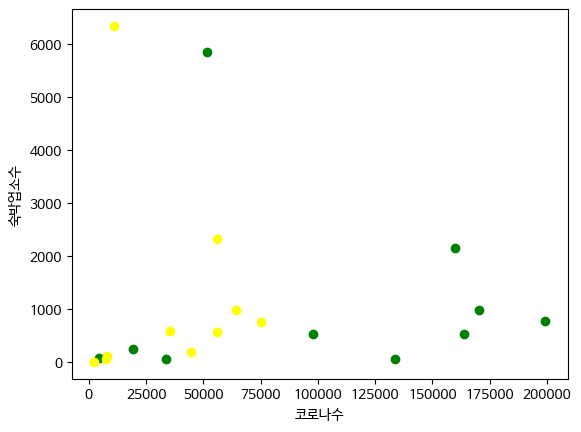

In [25]:
# 산점도 그리기

plt.scatter(data['2020년_x'], data['2020년_y'], color = 'green')
plt.scatter(data['2021년_x'], data['2021년_y'], color = 'yellow')

plt.xlabel('코로나수')
plt.ylabel('숙박업소수')
plt.show()

In [26]:
# 상관계수 계산 - 2020년
corr = data['2020년_x'].corr(data['2020년_y'])
print(f"코로나수와 숙박업소수 간의 상관계수: {corr:.3f}")

코로나수와 숙박업소수 간의 상관계수: -0.039


In [27]:
# 상관계수 계산 - 2021년
corr = data['2021년_x'].corr(data['2021년_y'])
print(f"코로나와 숙박업소수 간의 상관계수: {corr:3f}")

코로나와 숙박업소수 간의 상관계수: -0.098226


In [28]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_코로나.csv', encoding='CP949')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_숙박업소현황 _2020~2021.csv', encoding='CP949')

# 데이터 합치기
merged_df = pd.merge(df1, df2, on='구별')

# 상관관계 분석
correlation = merged_df[['구별','2020년_x', '2021년_x', '2020년_y', '2021년_y']].corr()

# 상관계수 출력
print(correlation)

          2020년_x   2021년_x   2020년_y   2021년_y
2020년_x  1.000000  0.992506 -0.038806 -0.028338
2021년_x  0.992506  1.000000 -0.105229 -0.098226
2020년_y -0.038806 -0.105229  1.000000  0.999122
2021년_y -0.028338 -0.098226  0.999122  1.000000


<ipython-input-28-5d910a3a8273>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_df[['구별','2020년_x', '2021년_x', '2020년_y', '2021년_y']].corr()
